<a href="https://colab.research.google.com/github/daniglevy/AI-Financial-Modeling/blob/main/AI_Financial_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Stocks Data

This code is the initial step in building an AI-driven financial model by fetching historical stock price data for S&P 500 companies using Python in Google Colab. Here's a concise explanation of what it does:

1.   Imports Libraries:

pandas for data manipulation, yfinance for downloading stock data, numpy for numerical computations, metplotilib and seaborn for data visualization, statsmodels and tensorflow for statistical modeling and machine learning and pyportfolioopt for Portfolio optimization.
2.   download_sp500_data Function:

Scrapes the list of S&P 500 company symbols from Wikipedia and normalizes specific tickers (e.g., 'BRK.B' to 'BRK-B') to match Yahoo Finance's format. Adds 'SPY' (S&P 500 ETF) for benchmarking.
3.   Downloads Stock Prices:

Uses yfinance to download daily closing prices for all tickers from January 1, 2015, to the current date.
4.   load_sp500_data Function:

Loads the saved sp500_data.csv into a DataFrame, setting the 'Date' column as the index with proper date parsing.
5. Execution:

Calls download_sp500_data() to fetch and save the data, then load_sp500_data() to load it for further use.

* Purpose: This code collects and stores historical closing prices of S&P 500 stocks and the SPY ETF, creating a dataset for subsequent financial modeling or analysis (e.g., portfolio optimization, AI-driven predictions)

In [1]:
# Ensure no output from matplotlib
%matplotlib inline

# Suppress all pip installation output
!pip install pandas yfinance -q
!pip install numpy scipy -q
!pip install matplotlib statsmodels tensorflow scikit-learn -q
!pip install pyportfolioopt seaborn -q

# Import libraries
import pandas as pd
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Function to download historical S&P 500 data
def download_sp500_data(start_date='2015-01-01'):
    sp500_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp500_tickers = sp500_df['Symbol'].tolist()
    ticker_mapping = {'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}
    normalized_tickers = [ticker_mapping.get(ticker, ticker) for ticker in sp500_tickers]
    normalized_tickers.append('SPY')  # Ensure SPY is included for comparison
    data = yf.download(normalized_tickers, start=start_date, end=datetime.today().strftime('%Y-%m-%d'),
                       auto_adjust=True, progress=False)['Close']  # Suppress yfinance progress bar
    data.to_csv('sp500_data.csv', index=True)  # Save the data silently
    return data

# Download and save the data silently
data = download_sp500_data()

# Function to load the saved S&P 500 data
def load_sp500_data():
    data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
    return data

# Load the data from the CSV file
data = load_sp500_data()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 11.6 MB/s eta 0:00:00


#Stock Performance Analysis

This code analyzes historical S&P 500 stock price data to identify top-performing companies based on a risk-adjusted return metric and visualizes their price trends. Below is a concise overview:

1. **Load Data**:
   - Imports `sp500_data.csv` into a DataFrame with dates as the index for time-series analysis.

2. **Performance Metrics**:
   - **Standard Deviation**: Measures volatility using daily percentage returns.
   - **Cumulative Return**: Calculates total return from start to end of the period.
   - **Combined Metric**: Divides cumulative return by standard deviation to prioritize high returns with low risk.

3. **Visualization**:
   - Plots price trends for the top 10 stocks (based on the combined metric) and their equally weighted portfolio.
   - Generates charts for the full dataset and specific periods (last 5, 3, and 1 years).

4. **Analysis Periods**:
   - Evaluates performance over the entire dataset and recent periods to identify consistent top performers.

**Conclusion**: The analysis identifies the top 10 S&P 500 stocks with the best risk-adjusted returns, visualized alongside their portfolio. This approach highlights stable, high-return investments for potential inclusion in an optimized portfolio.

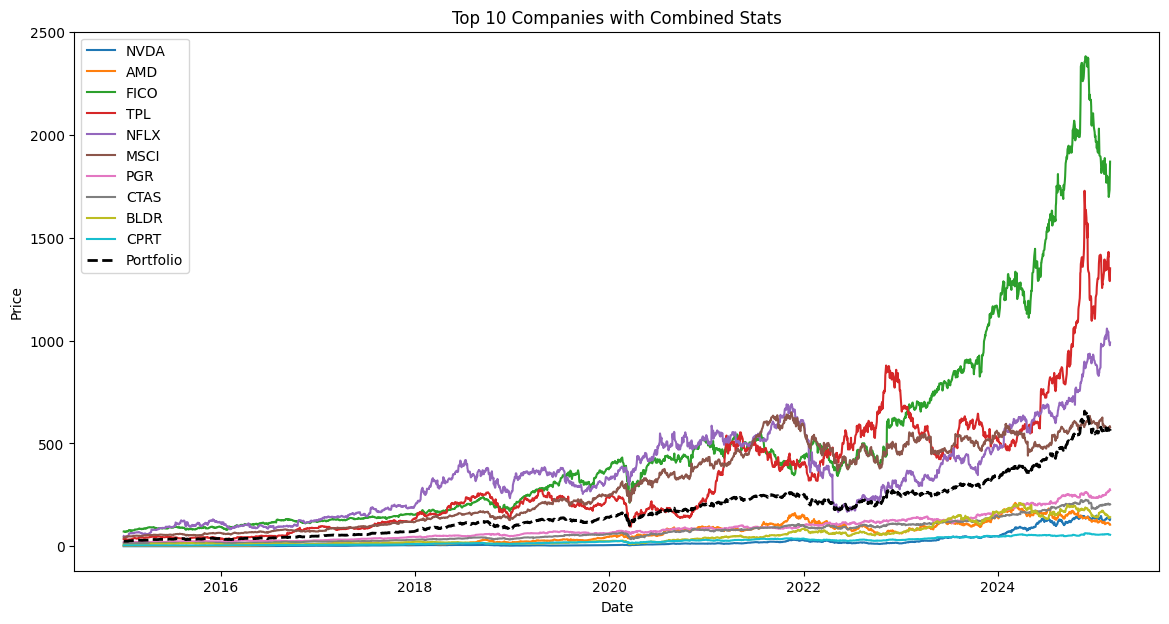

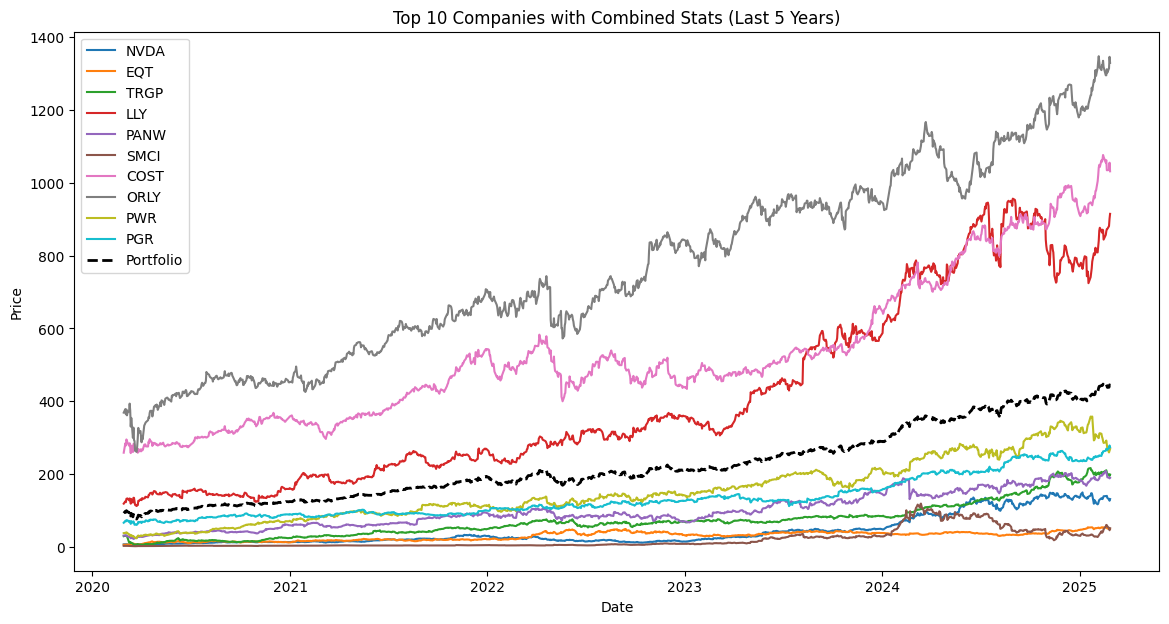

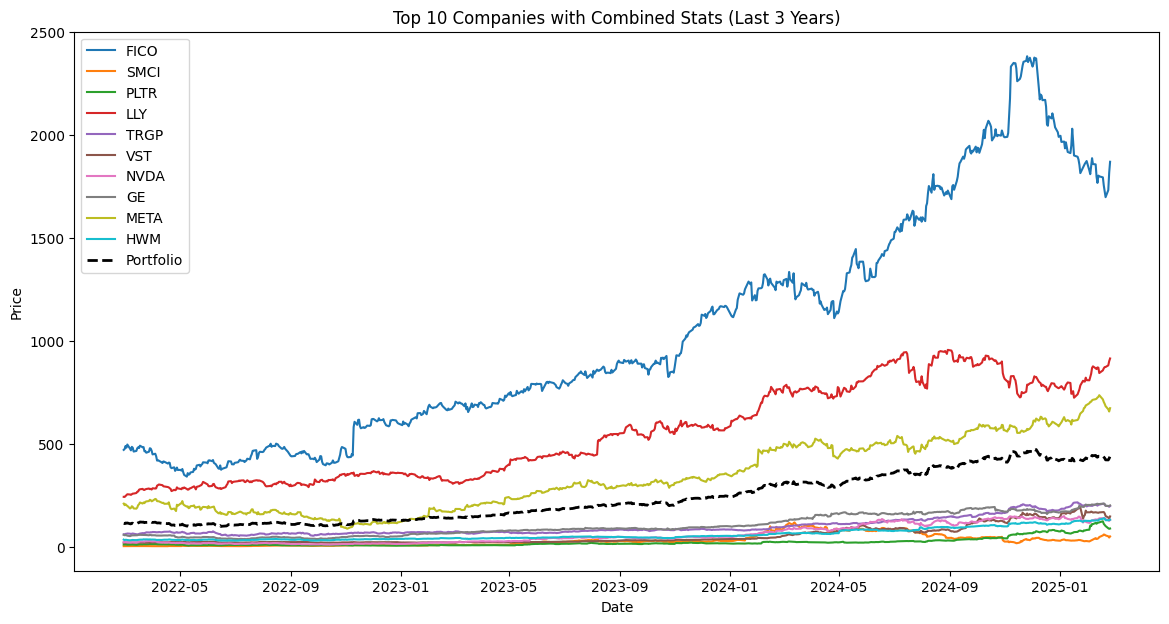

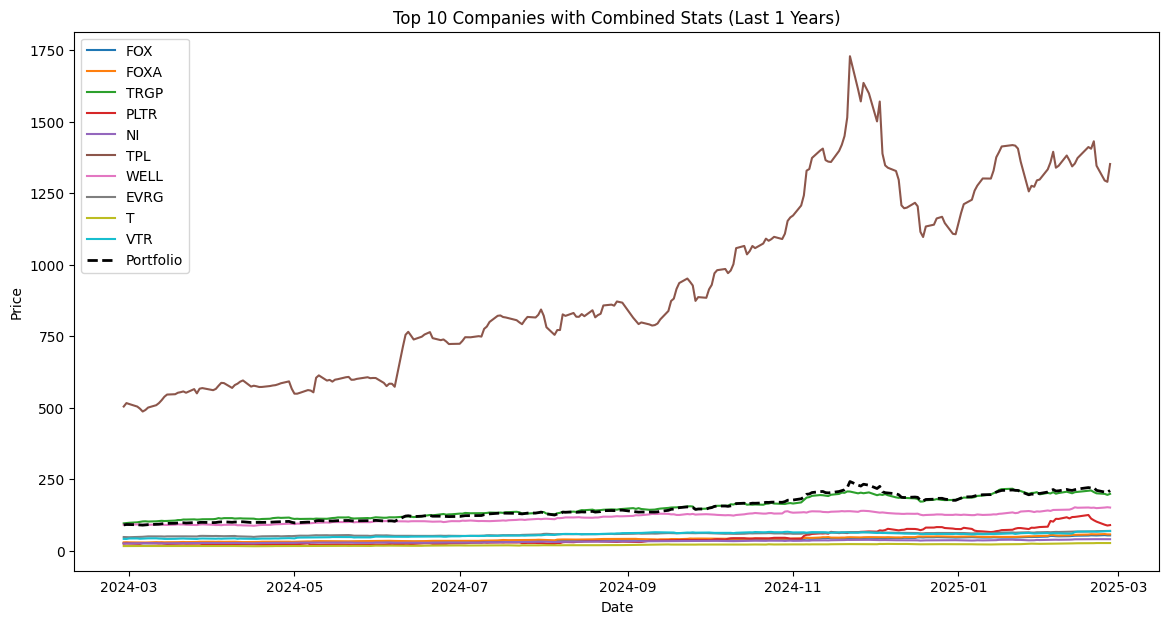

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the saved S&P 500 data
data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)

# Function to calculate standard deviation and cumulative return
def calculate_metrics(data):
    returns = data.pct_change().dropna()
    std_dev = returns.std()
    cumulative_return = (data.iloc[-1] / data.iloc[0]) - 1
    return std_dev, cumulative_return

# Function to combine standard deviation and cumulative return
def combine_stats(std_dev, cumulative_return):
    combined_stats = cumulative_return / std_dev
    return combined_stats

# Function to plot stock charts and portfolio
def plot_combined_chart(data, tickers, title):
    plt.figure(figsize=(14, 7))
    for ticker in tickers:
        plt.plot(data[ticker], label=ticker)
    portfolio = data[tickers].mean(axis=1)
    plt.plot(portfolio, label='Portfolio', linewidth=2, linestyle='--', color='black')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Calculate metrics for the entire period
std_dev, cumulative_return = calculate_metrics(data)

# Combine standard deviation and cumulative return
combined_stats = combine_stats(std_dev, cumulative_return)

# Identify top 10 companies with combined stats
top_10_combined_stats = combined_stats.nlargest(10).index.tolist()

# Plot combined chart for top 10 companies with combined stats
plot_combined_chart(data, top_10_combined_stats, 'Top 10 Companies with Combined Stats')

# Function to perform analysis for a specific period (e.g., last 5 years)
def analyze_period(years):
    end_date = datetime.today()
    start_date = end_date.replace(year=end_date.year - years)

    # Filter data for the specific period
    period_data = data.loc[start_date:end_date]

    # Calculate metrics for the specific period
    period_std_dev, period_cumulative_return = calculate_metrics(period_data)

    # Combine standard deviation and cumulative return for the specific period
    period_combined_stats = combine_stats(period_std_dev, period_cumulative_return)

    # Identify top 10 companies with combined stats for the specific period
    period_top_10_combined_stats = period_combined_stats.nlargest(10).index.tolist()

    # Plot combined chart for the specific period
    plot_combined_chart(period_data, period_top_10_combined_stats, f'Top 10 Companies with Combined Stats (Last {years} Years)')

# Perform analysis for last 5 years
analyze_period(5)

# Perform analysis for last 3 years
analyze_period(3)

# Perform analysis for last 1 year
analyze_period(1)

>Based on the analysis of 5-year, 3-year, and 1-year periods, we selected the following S&P 500 stocks for their optimal balance of low volatility and high returns:

- **Stocks**: EQT, TRGP, LLY, PANW, SMCI, COST, ORLY, PWR, PGR, FICO, AXON

**Selection Criteria**:
- **Low Standard Deviation**: Measures price volatility using daily percentage returns, indicating stability.
- **High Cumulative Return**: Calculates total return from the start to the end of each period, reflecting strong performance.

>**Conclusion**: These stocks were chosen for their consistent performance across multiple time horizons, making them ideal candidates for a stable, high-return portfolio.

# Financial Metrics Analysis for Selected Stocks

This code evaluates 11 selected S&P 500 stocks over a 5-year period (March 2020–March 2025) to assess their performance for portfolio inclusion. Below is a concise overview:

1. **Stock Selection and Data**:
   - Analyzes stocks: EQT, TRGP, LLY, PANW, SMCI, COST, ORLY, PWR, PGR, FICO, AXON.
   - Downloads closing prices and trading volumes using `yfinance`.

2. **Calculated Metrics**:
   - **Average Volume**: Trading activity over 3, 6, and 12 months to gauge liquidity.
   - **Linear Regression Slope**: Price trend over the period.
   - **Compounded Return**: Annualized return over 5 years.
   - **Maximum Drawdown**: Largest price drop to assess risk.
   - **P/E Std Dev (Proxy)**: Price volatility as a substitute for P/E ratio variability.

3. **Output**:
   - Formats metrics for clarity (e.g., percentages, comma-separated volumes).
   - Saves results to `stock_metrics.csv` for further analysis.

**Conclusion**: The analysis provides key metrics to evaluate the risk, return, and liquidity of selected stocks, supporting informed portfolio decisions. High compounded returns with lower drawdowns and stable volumes indicate robust candidates for investment.

In [7]:
# Import libraries
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
from datetime import datetime, timedelta

# Define the stocks and time period
stocks = ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']
end_date = datetime(2025, 3, 12)  # Current date
start_date = end_date - timedelta(days=5*365)  # 5 years ago

# Function to download data for specific stocks
def download_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date.strftime('%Y-%m-%d'),
                       end=end_date.strftime('%Y-%m-%d'), auto_adjust=True)
    return data['Close'], data['Volume']

# Download closing prices and volume
close_data, volume_data = download_stock_data(stocks, start_date, end_date)

# Function to calculate metrics
def calculate_metrics(close_df, volume_df, tickers):
    results = {}
    for ticker in tickers:
        # Ensure data exists for the ticker
        if ticker not in close_df.columns or close_df[ticker].isna().all():
            continue

        # Closing prices and volume
        prices = close_df[ticker].dropna()
        volumes = volume_df[ticker].dropna()

        # Average Volume (3, 6, 12 months)
        avg_vol_3m = volumes[-63:].mean()  # ~3 months (63 trading days)
        avg_vol_6m = volumes[-126:].mean()  # ~6 months (126 trading days)
        avg_vol_12m = volumes[-252:].mean()  # ~12 months (252 trading days)

        # Linear Regression (slope of closing prices over time)
        x = np.arange(len(prices))
        slope, _, _, _, _ = stats.linregress(x, prices)

        # Compounded Return
        initial_price = prices.iloc[0]
        final_price = prices.iloc[-1]
        compounded_return = (final_price / initial_price) ** (1 / 5) - 1  # Annualized over 5 years

        # Maximum Drawdown
        roll_max = prices.cummax()
        drawdowns = (prices - roll_max) / roll_max
        max_drawdown = drawdowns.min()

        # P/E Standard Deviation (Proxy: Using price volatility as a stand-in)
        # Note: Real P/E requires earnings data; here we use price std as a proxy
        pe_proxy = prices.pct_change().std() * 100  # Percentage volatility as a stand-in

        # Store results
        results[ticker] = {
            'Name': ticker,
            'Avg Vol 3M': avg_vol_3m,
            'Avg Vol 6M': avg_vol_6m,
            'Avg Vol 12M': avg_vol_12m,
            'Linear Regression Slope': slope,
            'Compounded Return': compounded_return,
            'P/E Std Dev (Proxy)': pe_proxy,
            'Max Drawdown': max_drawdown
        }

    return pd.DataFrame(results).T

# Calculate metrics
metrics_df = calculate_metrics(close_data, volume_data, stocks)

# Format the output
metrics_df['Avg Vol 3M'] = metrics_df['Avg Vol 3M'].apply(lambda x: f"{x:,.0f}")
metrics_df['Avg Vol 6M'] = metrics_df['Avg Vol 6M'].apply(lambda x: f"{x:,.0f}")
metrics_df['Avg Vol 12M'] = metrics_df['Avg Vol 12M'].apply(lambda x: f"{x:,.0f}")
metrics_df['Linear Regression Slope'] = metrics_df['Linear Regression Slope'].apply(lambda x: f"{x:.4f}")
metrics_df['Compounded Return'] = metrics_df['Compounded Return'].apply(lambda x: f"{x:.2%}")
metrics_df['P/E Std Dev (Proxy)'] = metrics_df['P/E Std Dev (Proxy)'].apply(lambda x: f"{x:.2f}")
metrics_df['Max Drawdown'] = metrics_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")

# Display the results
print("Stock Metrics for the Last 5 Years (March 2020 - March 2025):")
print(metrics_df)

# Save to CSV (optional)
metrics_df.to_csv('stock_metrics.csv', index=False)

[*********************100%***********************]  11 of 11 completed


Stock Metrics for the Last 5 Years (March 2020 - March 2025):
      Name  Avg Vol 3M  Avg Vol 6M Avg Vol 12M Linear Regression Slope  \
EQT    EQT   8,210,829   7,769,606   7,734,155                  0.0277   
TRGP  TRGP   1,753,456   1,727,779   1,649,177                  0.1214   
LLY    LLY   3,647,786   3,627,930   3,283,572                  0.6546   
PANW  PANW   5,571,070   5,265,557   6,135,703                  0.1227   
SMCI  SMCI  72,664,256  77,609,171  74,724,625                  0.0528   
COST  COST   2,139,659   1,986,269   1,957,638                  0.5030   
ORLY  ORLY     347,054     340,295     361,960                  0.7111   
PWR    PWR   1,582,678   1,187,448   1,045,490                  0.2176   
PGR    PGR   2,664,448   2,476,992   2,530,821                  0.1406   
FICO  FICO     206,421     176,897     178,666                  1.2333   
AXON  AXON     967,554     832,633     683,698                  0.2924   

     Compounded Return P/E Std Dev (Proxy) Max Dr

## Stock Price Forecasting with ARIMA and LSTM

This code forecasts 30-day stock prices for 11 selected S&P 500 stocks using ARIMA, LSTM, and an ensemble model. Below is a concise overview:

1. **Data Loading**:
   - Loads historical prices from `sp500_data.csv` for stocks: EQT, TRGP, LLY, PANW, SMCI, COST, ORLY, PWR, PGR, FICO, AXON.

2. **Forecasting Models**:
   - **ARIMA**: Fits an ARIMA(5,1,0) model to capture time-series trends.
   - **LSTM**: Trains a neural network with two LSTM layers to model complex price patterns, using 60-day sequences.
   - **Ensemble**: Averages ARIMA and LSTM predictions for improved accuracy.

3. **Visualization**:
   - Plots the last 100 days of actual prices and 30-day forecasts (ARIMA, LSTM, Ensemble) for each stock.

4. **Output**:
   - Saves forecasts to `forecast_results.csv` for further analysis.

**Conclusion**: The ensemble approach combines ARIMA’s statistical rigor with LSTM’s pattern recognition, providing robust 30-day price forecasts to guide portfolio decisions.

Forecasting for EQT...


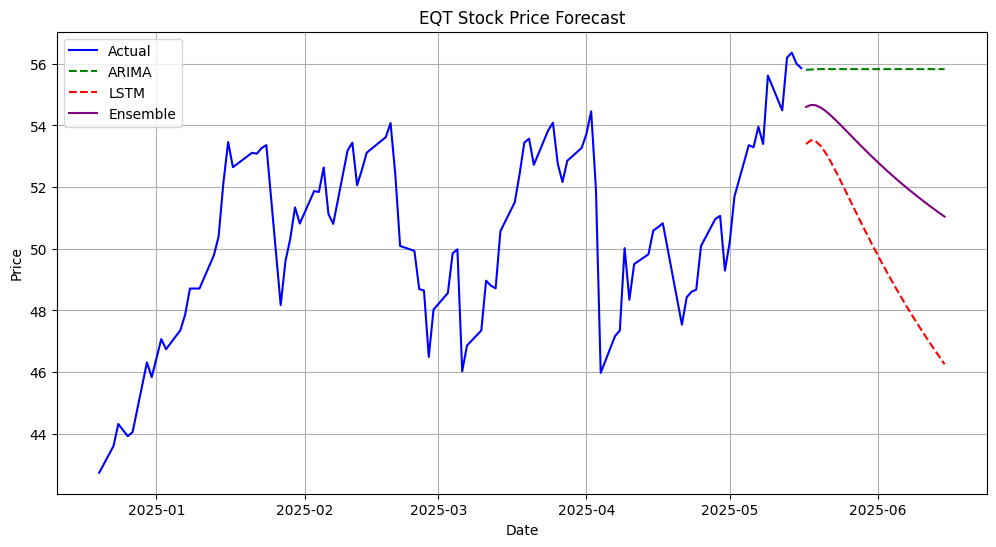

Forecasting for TRGP...


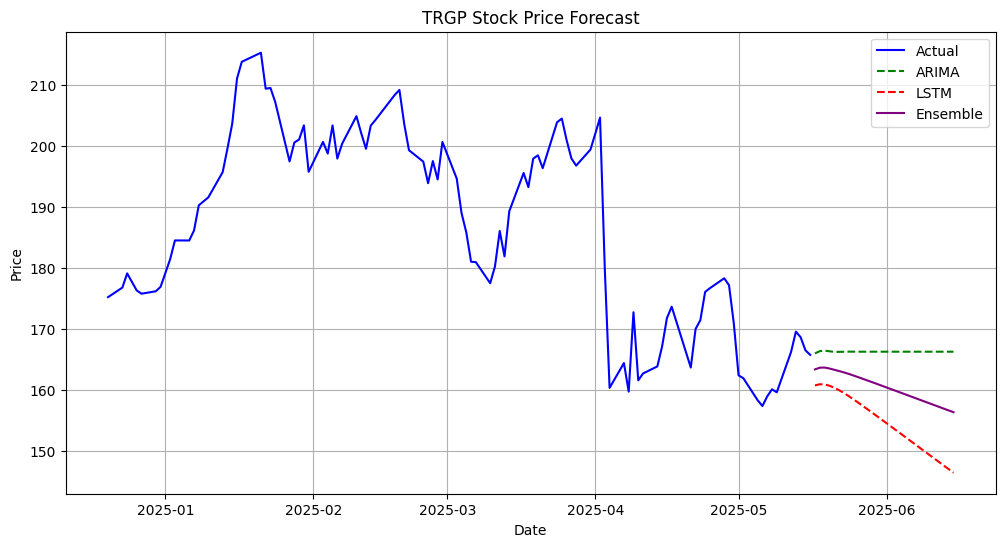

Forecasting for LLY...


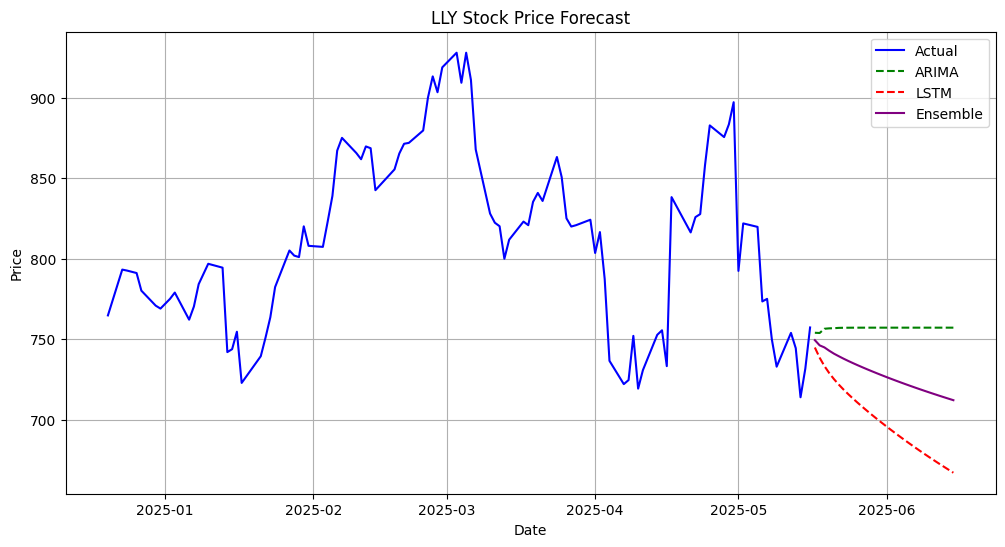

Forecasting for PANW...


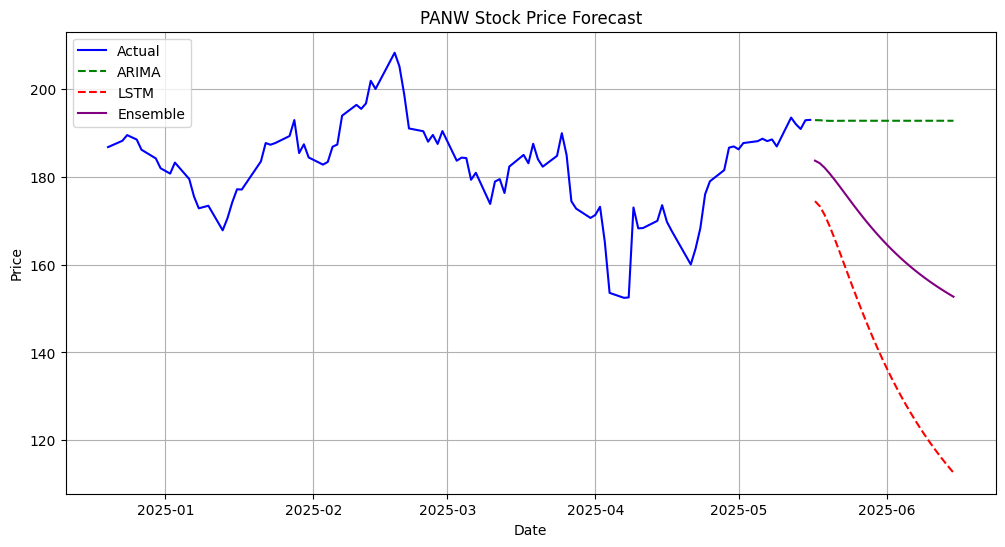

Forecasting for SMCI...


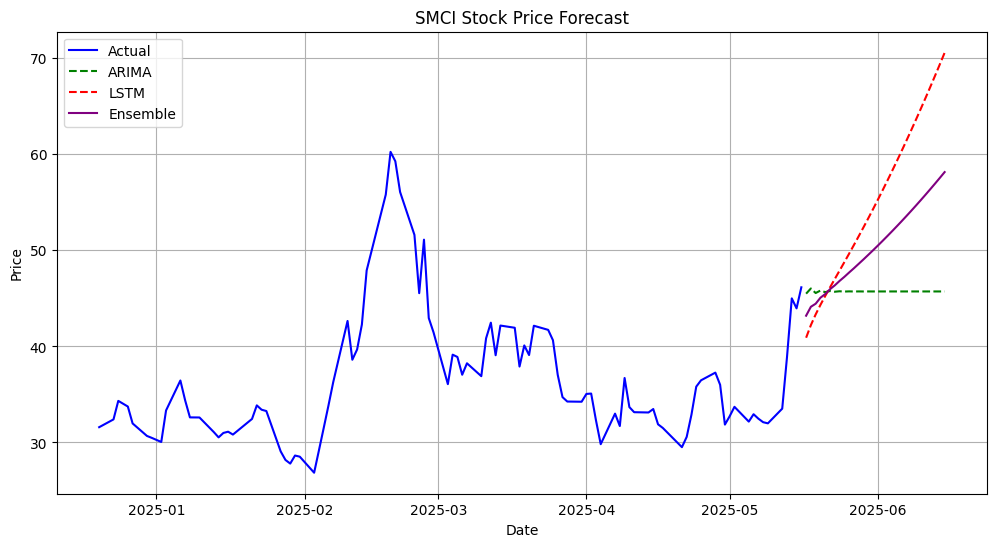

Forecasting for COST...


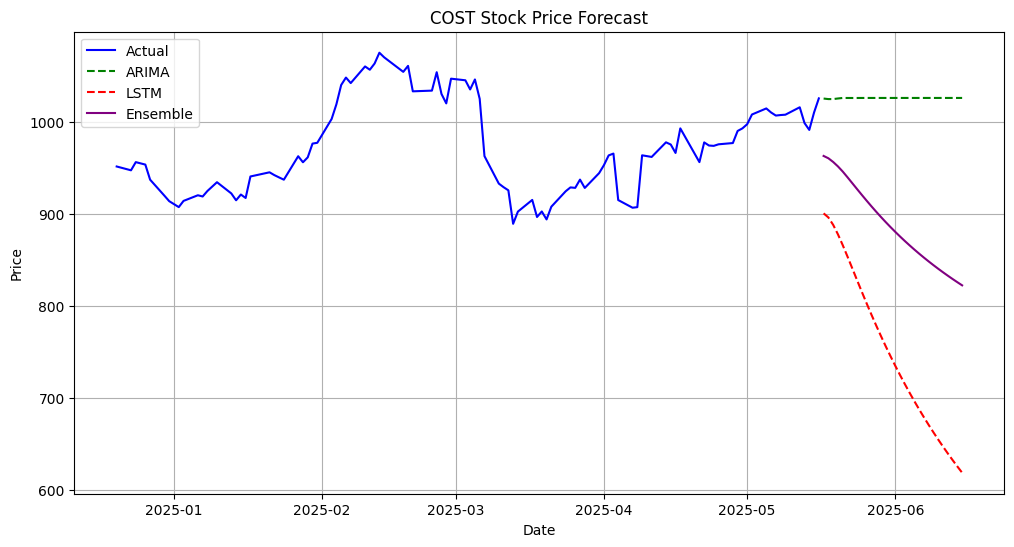

Forecasting for ORLY...


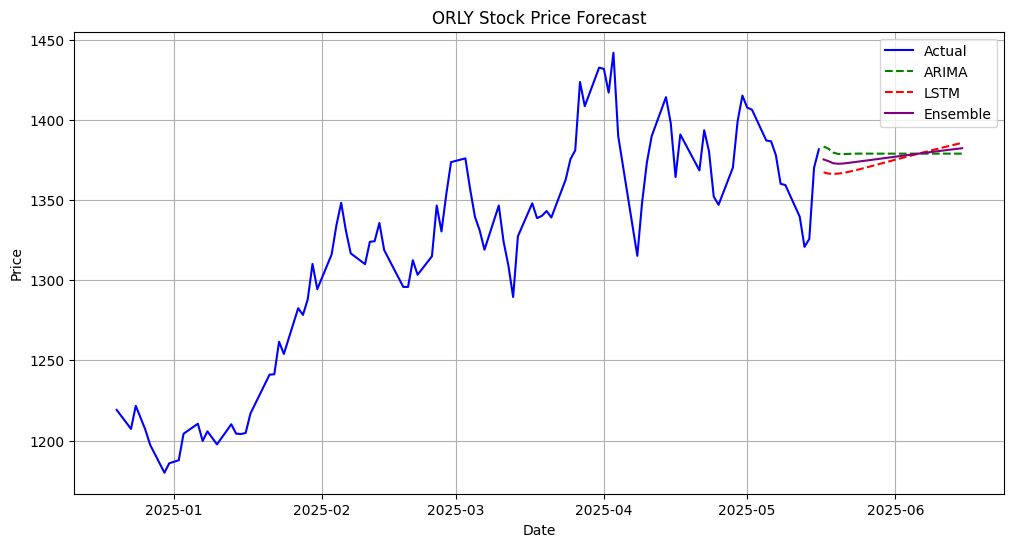

Forecasting for PWR...


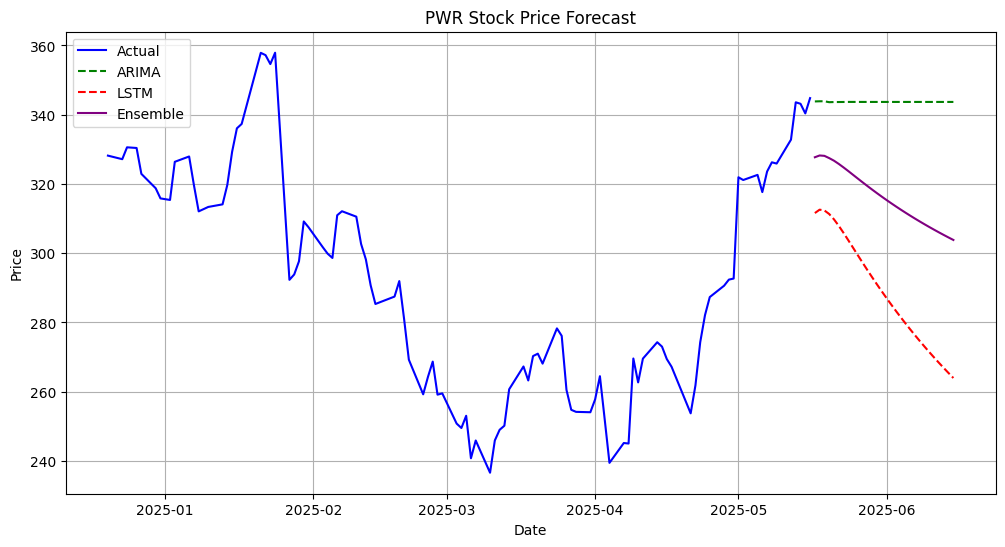

Forecasting for PGR...


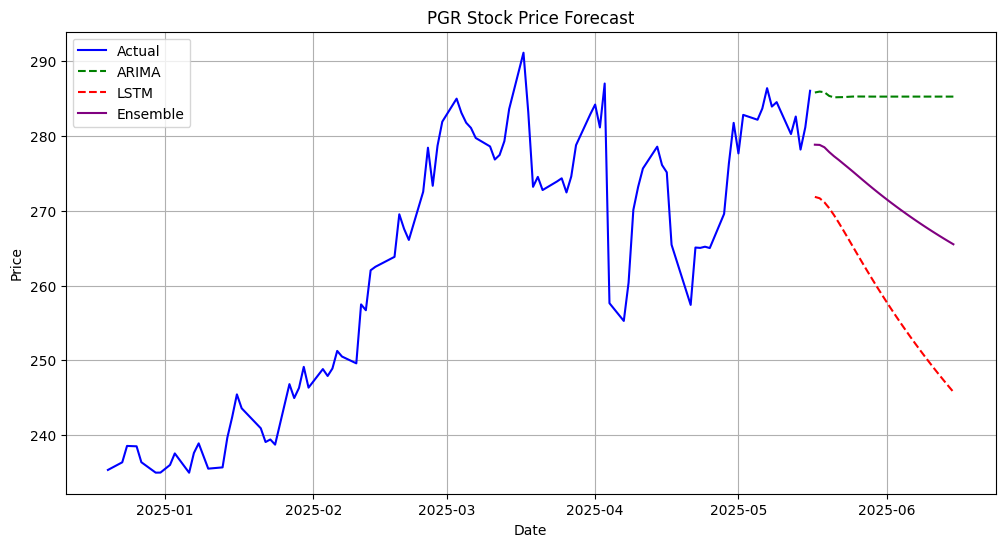

Forecasting for FICO...


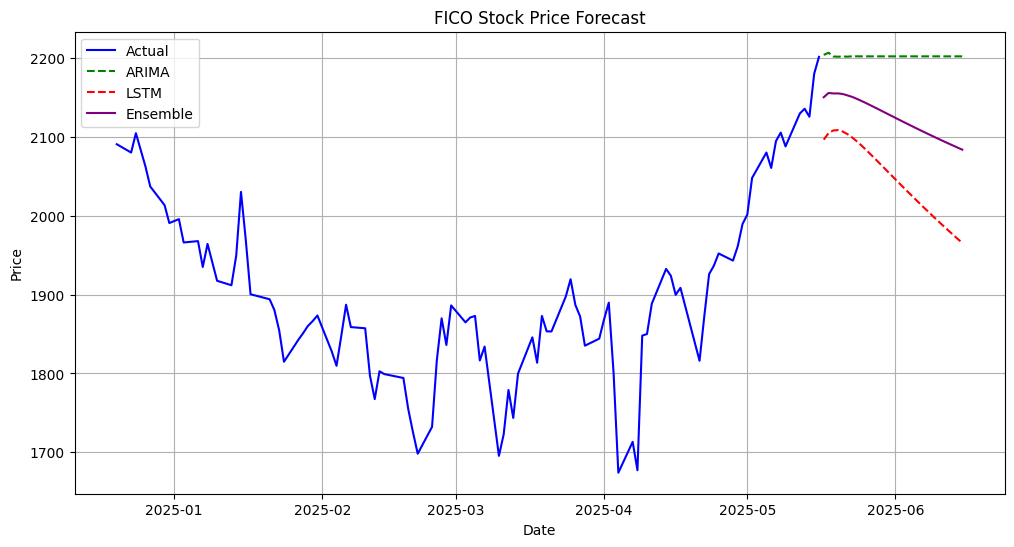

Forecasting for AXON...


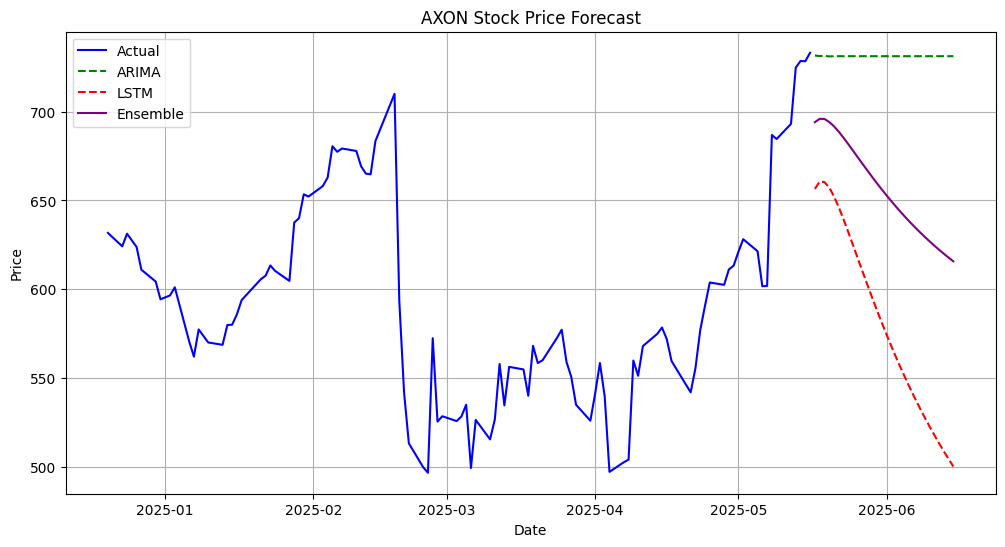

Forecasting complete. Results saved to 'forecast_results.csv'.


In [ ]:
# Ensure plots display in Colab
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Define the stocks to analyze
stocks = ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']

# Function to load stock data from sp500_data.csv
def load_stock_data():
    try:
        data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
        # Filter for specified stocks
        available_stocks = [stock for stock in stocks if stock in data.columns]
        if not available_stocks:
            raise ValueError("None of the specified stocks found in sp500_data.csv")
        return data[available_stocks]
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load data
data = load_stock_data()
if data is None or data.empty:
    print("Failed to load data. Please ensure sp500_data.csv is uploaded.")
    exit()

# Function to prepare data for LSTM
def prepare_lstm_data(series, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    train_size = int(len(X) * 0.8)
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    return X_train, y_train, X_test, y_test, scaler

# Function to build and train LSTM model
def build_lstm_model(look_back=60):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Forecasting function for each stock
def forecast_stock(stock, data, forecast_days=30, look_back=60):
    series = data[stock].dropna()

    # ARIMA Model
    try:
        arima_model = ARIMA(series, order=(5,1,0))
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=forecast_days)
    except Exception as e:
        print(f"ARIMA failed for {stock}: {e}")
        arima_forecast = np.zeros(forecast_days)

    # LSTM Model
    try:
        X_train, y_train, X_test, y_test, scaler = prepare_lstm_data(series, look_back)
        lstm_model = build_lstm_model(look_back)
        lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Prepare input for forecasting
        last_sequence = scaler.transform(series[-look_back:].values.reshape(-1, 1))
        lstm_forecast = []
        current_sequence = last_sequence.copy()

        for _ in range(forecast_days):
            current_sequence_reshaped = current_sequence.reshape((1, look_back, 1))
            next_pred = lstm_model.predict(current_sequence_reshaped, verbose=0)
            lstm_forecast.append(next_pred[0, 0])
            current_sequence = np.roll(current_sequence, -1)
            current_sequence[-1] = next_pred[0, 0]

        lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    except Exception as e:
        print(f"LSTM failed for {stock}: {e}")
        lstm_forecast = np.zeros(forecast_days)

    # Ensemble: Average of ARIMA and LSTM
    ensemble_forecast = (arima_forecast + lstm_forecast) / 2

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(series[-100:], label='Actual', color='blue')
    forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    plt.plot(forecast_index, arima_forecast, label='ARIMA', color='green', linestyle='--')
    plt.plot(forecast_index, lstm_forecast, label='LSTM', color='red', linestyle='--')
    plt.plot(forecast_index, ensemble_forecast, label='Ensemble', color='purple', linestyle='-')
    plt.title(f'{stock} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return arima_forecast, lstm_forecast, ensemble_forecast

# Run forecasting for each stock
forecast_results = {}
for stock in stocks:
    if stock in data.columns:
        print(f"Forecasting for {stock}...")
        arima_forecast, lstm_forecast, ensemble_forecast = forecast_stock(stock, data)
        forecast_results[stock] = {
            'ARIMA': arima_forecast,
            'sLSTM': lstm_forecast,
            'Ensemble': ensemble_forecast
        }
    else:
        print(f"Stock {stock} not found in data.")

# Save forecast results to a CSV
forecast_df = pd.DataFrame()
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
for stock in forecast_results:
    # Validate that all expected keys exist
    if all(key in forecast_results[stock] for key in ['ARIMA', 'sLSTM', 'Ensemble']):
        forecast_df[f'{stock}_ARIMA'] = forecast_results[stock]['ARIMA']
        forecast_df[f'{stock}_LSTM'] = forecast_results[stock]['sLSTM']  # Fixed key from 'LSTM' to 'sLSTM'
        forecast_df[f'{stock}_Ensemble'] = forecast_results[stock]['Ensemble']
    else:
        print(f"Warning: Missing forecast data for {stock}. Available keys: {list(forecast_results[stock].keys())}")
forecast_df.index = forecast_index
forecast_df.to_csv('forecast_results.csv')

print("Forecasting complete. Results saved to 'forecast_results.csv'.")

## Portfolio Optimization and Analysis

This code optimizes a portfolio of 11 S&P 500 stocks using multiple strategies and evaluates their performance. Below is a concise overview:

1. **Data Handling**:
   - Loads or downloads closing prices for stocks: EQT, TRGP, LLY, PANW, SMCI, COST, ORLY, PWR, PGR, FICO, AXON from `sp500_data.csv` or Yahoo Finance (2015–present).

2. **Correlation Analysis**:
   - Computes and visualizes the correlation matrix of daily returns, saved as `correlation_heatmap.png` and `correlation_matrix.csv`.

3. **Portfolio Optimization**:
   - **Maximum Sharpe Ratio (MSR)**: Maximizes risk-adjusted returns.
   - **Minimum Downside Risk (MDR)**: Minimizes losses below a target return.
   - **Global Minimum Variance (GMVP)**: Minimizes portfolio volatility.
   - **Risk Parity (HRP)**: Allocates risk equally across stocks using hierarchical clustering.
   - Calculates expected return, volatility, Sharpe ratio, and downside risk for each portfolio.

4. **Rolling Window Analysis**:
   - Evaluates portfolio performance over 1-year rolling windows, identifying periods with high returns and low volatility.
   - Saves results to `rolling_metrics_*.csv` and plots return vs. volatility.

5. **Efficient Frontier**:
   - Plots the efficient frontier with optimized portfolios, saved as `efficient_frontier.png`.

**Conclusion**: The portfolio optimization identifies optimal stock allocations, with MSR offering high returns, GMVP minimizing risk, and HRP balancing risk contributions. Rolling analysis and the efficient frontier guide stable, high-return investment decisions.

Files in current directory: ['.config', 'sp500_data.csv', 'sample_data']
Loading data from sp500_data.csv...
Loaded stocks from CSV: ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']
Data shape: (2610, 11)
Data columns: ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']
First few rows of data:
                  EQT       TRGP        LLY       PANW   SMCI        COST  \
Date                                                                        
2015-01-02  38.979568  63.715916  57.687557  20.236668  3.473  114.455833   
2015-01-05  36.897861  59.032158  57.119411  20.621668  3.367  113.154556   
2015-01-06  36.475487  57.199127  57.407619  20.308332  3.276  114.649834   
2015-01-07  36.525753  56.657543  57.004154  20.921667  3.300  116.646233   
2015-01-08  37.988998  58.258465  58.354527  21.201668  3.473  117.648399   

                  ORLY        PWR        PGR       FICO       AXON  
Date                       

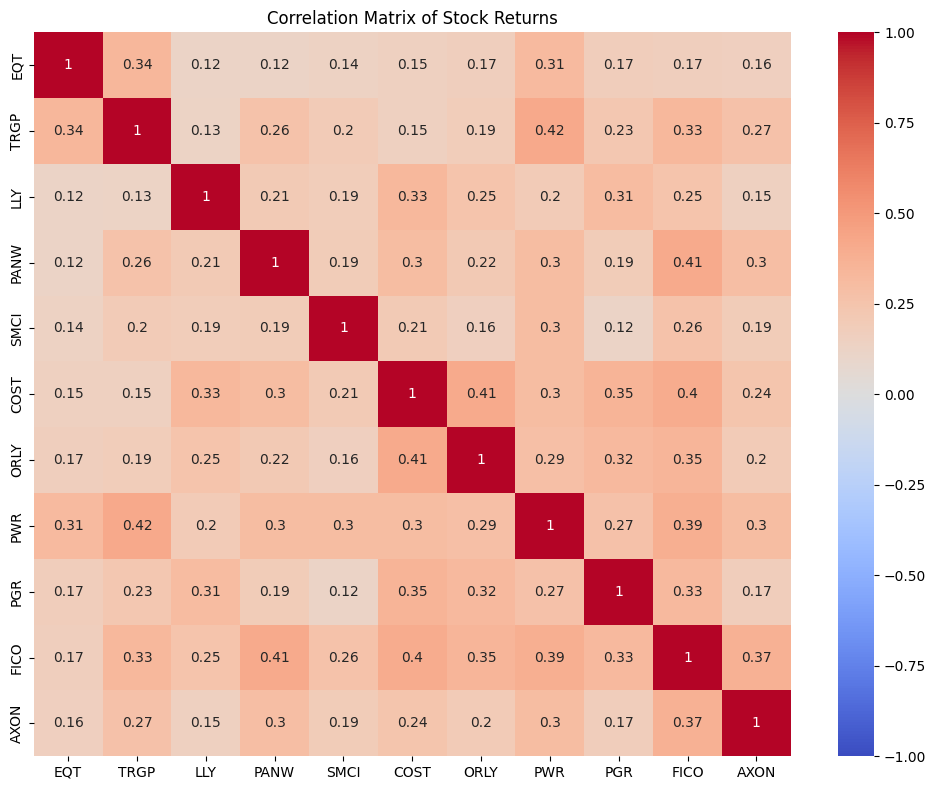

Correlation matrix heatmap saved to 'correlation_heatmap.png'.
Correlation matrix saved to 'correlation_matrix.csv'.
MDR optimization failed: tuple index out of range

Portfolio Weights:
                 EQT     TRGP      LLY     PANW     SMCI     COST     ORLY  \
MSR          0.00000  0.00000  0.17846  0.00000  0.00000  0.19136  0.01038   
GMVP         0.03877  0.00000  0.13761  0.04598  0.00000  0.31327  0.15043   
Risk Parity  0.05474  0.03809  0.15925  0.05384  0.02899  0.15563  0.10554   

                 PWR      PGR     FICO     AXON  
MSR          0.04441  0.34145  0.16420  0.06974  
GMVP         0.04478  0.25710  0.00000  0.01206  
Risk Parity  0.06863  0.20163  0.08507  0.04858  
Portfolio weights saved to 'portfolio_weights.csv'.

Portfolio Optimization Results:

MSR:
  Expected Annual Return: 0.3042
  Annual Volatility: 2.9688
  Sharpe Ratio: 0.0957
  Downside Risk: 0.1870
  Allocations:
    LLY: 0.1785
    COST: 0.1914
    ORLY: 0.0104
    PWR: 0.0444
    PGR: 0.3414
    

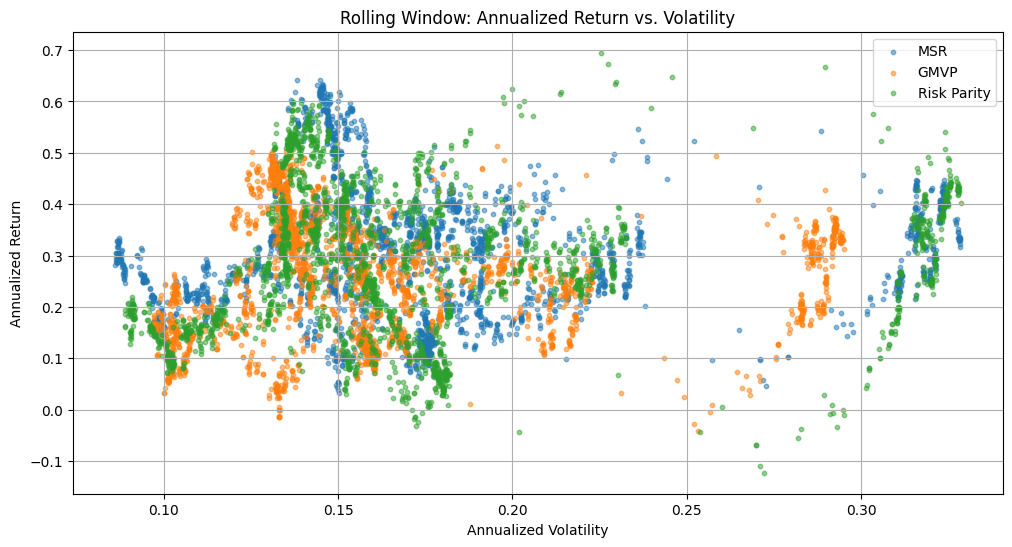

Rolling metrics plot saved to 'rolling_metrics_plot.png'.

Manually plotting Efficient Frontier...
Expected Returns (mu): [0.03482626202172545, 0.09602326516955673, 0.28198417636876694, 0.24417759482472357, 0.28014597546900877, 0.23691904920853357, 0.21096655524466446, 0.27516482543760645, 0.28999888471193436, 0.3916592562609751, 0.3796896893216357]
Covariance Matrix diagonal: [0.23815517107756926, 0.27452187143554674, 0.08309120739706108, 0.14965683668534438, 0.456506793204778, 0.047485270373114646, 0.07002060270215019, 0.11741059644540121, 0.056815188958396705, 0.12160538201145489, 0.23579497530992008]
Optimization Results: {'MSR': {'Return': np.float64(0.3041602706113218), 'Volatility': np.float64(2.9688407552687517), 'Sharpe Ratio': np.float64(0.09571421778248877), 'Downside Risk': np.float64(0.18702355314777547)}, 'GMVP': {'Return': np.float64(0.25918180418007364), 'Volatility': np.float64(2.7089987482391775), 'Sharpe Ratio': np.float64(0.08829158903655436), 'Downside Risk': np.fl

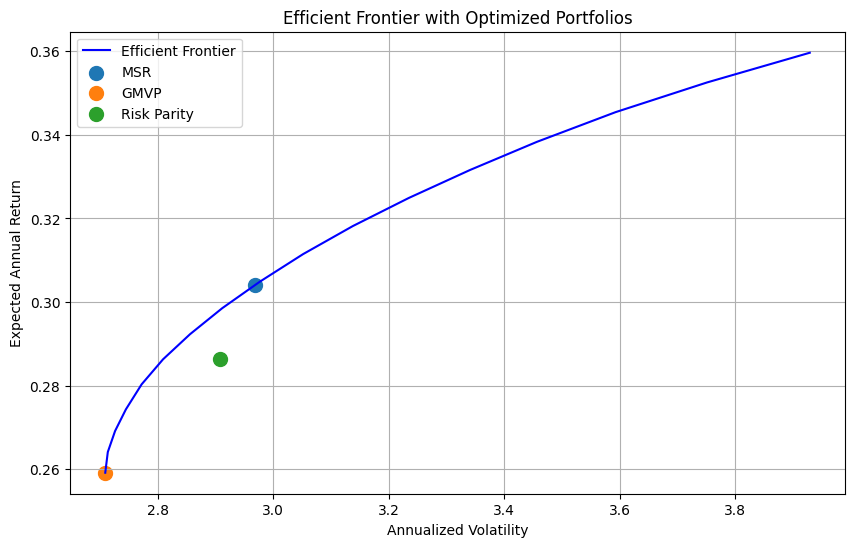

In [5]:
# Ensure plots display in Colab
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns, HRPOpt
from pypfopt import objective_functions
import yfinance as yf
from datetime import datetime
import os

# Define the stocks to analyze
stocks = ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']

# Function to download S&P 500 data including specified stocks
def download_sp500_data(start_date='2015-01-01'):
    try:
        # Get S&P 500 tickers from Wikipedia
        sp500_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        sp500_tickers = sp500_df['Symbol'].tolist()
        ticker_mapping = {'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}
        normalized_tickers = [ticker_mapping.get(ticker, ticker) for ticker in sp500_tickers]
        normalized_tickers.append('SPY')  # Include SPY for reference

        # Ensure specified stocks are included
        for stock in stocks:
            if stock not in normalized_tickers:
                normalized_tickers.append(stock)

        # Download data
        print("Downloading stock data...")
        data = yf.download(normalized_tickers, start=start_date, end=datetime.today().strftime('%Y-%m-%d'), auto_adjust=True)['Close']

        # Check if data is empty
        if data.empty:
            raise ValueError("No data downloaded from yfinance.")

        # Save to CSV
        data.to_csv('sp500_data.csv')
        print("Data saved to sp500_data.csv")

        # Filter for specified stocks
        available_stocks = [stock for stock in stocks if stock in data.columns]
        if not available_stocks:
            raise ValueError(f"None of the specified stocks {stocks} found in downloaded data. Available columns: {list(data.columns)}")

        return data[available_stocks]
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Function to load stock data from sp500_data.csv or download if missing
def load_stock_data():
    try:
        # Check if file exists
        print("Files in current directory:", os.listdir('.'))
        if os.path.exists('sp500_data.csv'):
            print("Loading data from sp500_data.csv...")
            data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
            if data.empty:
                raise ValueError("sp500_data.csv is empty.")
            available_stocks = [stock for stock in stocks if stock in data.columns]
            if not available_stocks:
                print(f"Available columns in sp500_data.csv: {list(data.columns)}")
                raise ValueError(f"None of the specified stocks {stocks} found in sp500_data.csv columns.")
            print(f"Loaded stocks from CSV: {available_stocks}")
            return data[available_stocks]
        else:
            print("sp500_data.csv not found. Downloading data...")
            return download_sp500_data()
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load or download data
data = load_stock_data()
if data is None or data.empty:
    print("Failed to load or download data. Please check your internet connection or yfinance availability.")
    exit()

# Verify data
print(f"Data shape: {data.shape}")
print(f"Data columns: {list(data.columns)}")
print(f"First few rows of data:\n{data.head()}")

# Calculate daily returns
returns = data.pct_change().dropna()
if returns.empty:
    print("No valid returns data after calculating percentage changes.")
    exit()

# Calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data, returns_data=False, compounding=True, frequency=252)
cov_matrix = risk_models.sample_cov(data, returns_data=False, frequency=252)

# Correlation Matrix
print("\nComputing correlation matrix of stocks...")
correlation_matrix = returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Stock Returns')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
print("Correlation matrix heatmap saved to 'correlation_heatmap.png'.")
correlation_matrix.to_csv('correlation_matrix.csv')
print("Correlation matrix saved to 'correlation_matrix.csv'.")

# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate=0.02):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Corrected scaling
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Function to calculate downside risk
def downside_risk(weights, returns, target_return=0):
    portfolio_returns = returns @ weights
    downside = portfolio_returns[portfolio_returns < target_return]
    return np.sqrt(np.mean(downside ** 2)) * np.sqrt(252) if len(downside) > 0 else 0

# Portfolio Optimization
results = {}
allocations = {}
risk_free_rate = 0.02  # Assumed annual risk-free rate (e.g., 2%)

# 1. Maximum Sharpe Ratio (MSR)
try:
    ef_msr = EfficientFrontier(mu, cov_matrix, weight_bounds=(0, 1))
    ef_msr.max_sharpe(risk_free_rate=risk_free_rate)
    msr_weights = ef_msr.clean_weights()
    msr_weights_array = np.array(list(msr_weights.values()))
    msr_return, msr_volatility, msr_sharpe = portfolio_performance(msr_weights_array, returns, cov_matrix, risk_free_rate)
    msr_downside = downside_risk(msr_weights_array, returns)
    results['MSR'] = {
        'Return': msr_return,
        'Volatility': msr_volatility,
        'Sharpe Ratio': msr_sharpe,
        'Downside Risk': msr_downside
    }
    allocations['MSR'] = msr_weights
except Exception as e:
    print(f"MSR optimization failed: {e}")

# 2. Minimum Downside Risk (MDR)
try:
    ef_mdr = EfficientFrontier(mu, cov_matrix, weight_bounds=(0, 1))
    ef_mdr.convex_objective(lambda w: downside_risk(w, returns, target_return=0))
    mdr_weights = ef_mdr.clean_weights()
    mdr_weights_array = np.array(list(mdr_weights.values()))
    mdr_return, mdr_volatility, mdr_sharpe = portfolio_performance(mdr_weights_array, returns, cov_matrix, risk_free_rate)
    mdr_downside = downside_risk(mdr_weights_array, returns)
    results['MDR'] = {
        'Return': mdr_return,
        'Volatility': mdr_volatility,
        'Sharpe Ratio': mdr_sharpe,
        'Downside Risk': mdr_downside
    }
    allocations['MDR'] = mdr_weights
except Exception as e:
    print(f"MDR optimization failed: {e}")

# 3. Global Minimum Variance Portfolio (GMVP)
try:
    ef_gmvp = EfficientFrontier(mu, cov_matrix, weight_bounds=(0, 1))
    ef_gmvp.min_volatility()
    gmvp_weights = ef_gmvp.clean_weights()
    gmvp_weights_array = np.array(list(gmvp_weights.values()))
    gmvp_return, gmvp_volatility, gmvp_sharpe = portfolio_performance(gmvp_weights_array, returns, cov_matrix, risk_free_rate)
    gmvp_downside = downside_risk(gmvp_weights_array, returns)
    results['GMVP'] = {
        'Return': gmvp_return,
        'Volatility': gmvp_volatility,
        'Sharpe Ratio': gmvp_sharpe,
        'Downside Risk': gmvp_downside
    }
    allocations['GMVP'] = gmvp_weights
except Exception as e:
    print(f"GMVP optimization failed: {e}")

# 4. Risk Parity (using Hierarchical Risk Parity)
try:
    hrp = HRPOpt(returns)
    hrp.optimize()
    rp_weights = hrp.clean_weights()
    rp_weights_array = np.array(list(rp_weights.values()))
    rp_return, rp_volatility, rp_sharpe = portfolio_performance(rp_weights_array, returns, cov_matrix, risk_free_rate)
    rp_downside = downside_risk(rp_weights_array, returns)
    results['Risk Parity'] = {
        'Return': rp_return,
        'Volatility': rp_volatility,
        'Sharpe Ratio': rp_sharpe,
        'Downside Risk': rp_downside
    }
    allocations['Risk Parity'] = rp_weights
except Exception as e:
    print(f"Risk Parity optimization failed: {e}")

# Display portfolio weights with correlation matrix
if allocations:
    print("\nPortfolio Weights:")
    weights_df = pd.DataFrame(allocations).T
    weights_df = weights_df[stocks]  # Ensure correct order
    print(weights_df)
    weights_df.to_csv('portfolio_weights.csv')
    print("Portfolio weights saved to 'portfolio_weights.csv'.")

# Display results
if results:
    print("\nPortfolio Optimization Results:")
    for method, metrics in results.items():
        print(f"\n{method}:")
        print(f"  Expected Annual Return: {metrics['Return']:.4f}")
        print(f"  Annual Volatility: {metrics['Volatility']:.4f}")
        print(f"  Sharpe Ratio: {metrics['Sharpe Ratio']:.4f}")
        print(f"  Downside Risk: {metrics['Downside Risk']:.4f}")
        print(f"  Allocations:")
        for stock, weight in allocations[method].items():
            if weight > 0:
                print(f"    {stock}: {weight:.4f}")
else:
    print("No optimization results to display.")

# Save results to CSV
if results:
    results_df = pd.DataFrame(results).T
    results_df.to_csv('portfolio_results.csv')
    allocations_df = pd.DataFrame(allocations).T
    allocations_df.to_csv('portfolio_allocations.csv')
    print("\nResults saved to 'portfolio_results.csv' and 'portfolio_allocations.csv'.")

# Rolling Window Analysis for Low Volatility and High Return
if results:
    print("\nPerforming rolling window analysis...")
    window = 252  # 1 year (trading days)
    rolling_metrics = {method: {'Return': [], 'Volatility': [], 'Date': []} for method in results}

    for method in results:
        weights = np.array(list(allocations[method].values()))
        for i in range(window, len(returns)):
            window_returns = returns.iloc[i-window:i]
            portfolio_returns = window_returns @ weights
            ann_return = portfolio_returns.mean() * 252
            ann_volatility = portfolio_returns.std() * np.sqrt(252)
            rolling_metrics[method]['Return'].append(ann_return)
            rolling_metrics[method]['Volatility'].append(ann_volatility)
            rolling_metrics[method]['Date'].append(returns.index[i])

    # Identify periods with low volatility and high return
    print("\nPeriods with Low Volatility and High Return:")
    for method in rolling_metrics:
        returns_series = pd.Series(rolling_metrics[method]['Return'])
        volatility_series = pd.Series(rolling_metrics[method]['Volatility'])
        dates = rolling_metrics[method]['Date']

        # Define thresholds (e.g., median)
        return_threshold = returns_series.median()
        volatility_threshold = volatility_series.median()

        # Find periods where return > threshold and volatility < threshold
        optimal_periods = (returns_series > return_threshold) & (volatility_series < volatility_threshold)
        optimal_indices = optimal_periods[optimal_periods].index

        if optimal_indices.size > 0:
            print(f"\n{method}:")
            for idx in optimal_indices[:5]:  # Limit to top 5 periods
                start_date = dates[idx - window]
                end_date = dates[idx]
                print(f"  Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
                print(f"    Annualized Return: {returns_series[idx]:.4f}")
                print(f"    Annualized Volatility: {volatility_series[idx]:.4f}")
        else:
            print(f"\n{method}: No periods found with above-median return and below-median volatility.")

    # Save rolling metrics to CSV
    for method in rolling_metrics:
        df = pd.DataFrame({
            'Date': rolling_metrics[method]['Date'],
            'Annualized Return': rolling_metrics[method]['Return'],
            'Annualized Volatility': rolling_metrics[method]['Volatility']
        })
        df.to_csv(f'rolling_metrics_{method.lower().replace(" ", "_")}.csv', index=False)
    print("\nRolling metrics saved to 'rolling_metrics_*.csv' files.")

    # Plot rolling return vs. volatility
    plt.figure(figsize=(12, 6))
    for method in rolling_metrics:
        plt.scatter(
            rolling_metrics[method]['Volatility'],
            rolling_metrics[method]['Return'],
            label=method,
            alpha=0.5,
            s=10
        )
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Return')
    plt.title('Rolling Window: Annualized Return vs. Volatility')
    plt.legend()
    plt.grid(True)
    plt.savefig('rolling_metrics_plot.png')
    plt.show()
    print("Rolling metrics plot saved to 'rolling_metrics_plot.png'.")

# Manual Plotting of Efficient Frontier
if results:
    try:
        print("\nManually plotting Efficient Frontier...")
        # Debugging: Check input data
        print("Expected Returns (mu):", mu.tolist())
        print("Covariance Matrix diagonal:", np.diag(cov_matrix).tolist())
        print("Optimization Results:", {method: {k: v for k, v in metrics.items()} for method, metrics in results.items()})

        # Initialize figure
        fig, ax = plt.subplots(figsize=(10, 6))

        # Compute efficient frontier manually
        ef = EfficientFrontier(mu, cov_matrix, weight_bounds=(0, 1))
        min_return = min(mu)
        max_return = max(mu)
        target_returns = np.linspace(min_return, max_return * 0.9, 50)  # Avoid extreme returns
        frontier_volatilities = []
        frontier_returns = []

        for target_return in target_returns:
            try:
                ef.efficient_return(target_return=target_return)
                weights = ef.clean_weights()
                weights_array = np.array(list(weights.values()))
                ret, vol, _ = portfolio_performance(weights_array, returns, cov_matrix, risk_free_rate)
                frontier_returns.append(ret)
                frontier_volatilities.append(vol)
            except Exception as e:
                print(f"Failed to compute frontier point at return {target_return:.4f}: {e}")
                continue

        # Plot the frontier curve
        ax.plot(frontier_volatilities, frontier_returns, 'b-', label='Efficient Frontier')

        # Scatter plot for each portfolio
        for method, metrics in results.items():
            print(f"Plotting {method}: Volatility={metrics['Volatility']:.4f}, Return={metrics['Return']:.4f}")
            ax.scatter(metrics['Volatility'], metrics['Return'], label=method, s=100)

        ax.set_title('Efficient Frontier with Optimized Portfolios')
        ax.set_xlabel('Annualized Volatility')
        ax.set_ylabel('Expected Annual Return')
        ax.legend()
        ax.grid(True)

        # Save and display plot
        plt.savefig('efficient_frontier.png', dpi=300, bbox_inches='tight')
        print("Plot saved to 'efficient_frontier.png'")
        if os.path.exists('efficient_frontier.png'):
            print("Confirmed: 'efficient_frontier.png' exists in directory")
        else:
            print("Warning: 'efficient_frontier.png' was not found after saving")
        plt.show()

    except Exception as e:
        print(f"Failed to plot efficient frontier: {e}")
else:
    print("Skipping efficient frontier plot due to no optimization results.")

## Portfolio Performance Evaluation

This code evaluates the performance of three optimized portfolios for 11 S&P 500 stocks over multiple time periods by calculating and visualizing cumulative returns. Below is a concise overview:

1. **Portfolio Definitions**:
   - Analyzes stocks: EQT, TRGP, LLY, PANW, SMCI, COST, ORLY, PWR, PGR, FICO, AXON.
   - Portfolios:
     - **Maximum Sharpe Ratio (MSR)**: Optimized for risk-adjusted returns.
     - **Global Minimum Variance (GMVP)**: Minimizes volatility.
     - **Risk Parity**: Balances risk contributions across stocks.

2. **Data Handling**:
   - Loads or downloads closing prices from `sp500_data.csv` or Yahoo Finance for 2021–2025.
   - Computes daily returns for analysis.

3. **Performance Analysis**:
   - Calculates cumulative returns for three periods: 2021–2025, 2023–2025, and 2025 (year-to-date).
   - Normalizes portfolio weights to ensure they sum to 1.

4. **Visualization**:
   - Plots cumulative returns for each portfolio across the specified periods, enabling comparison of performance.

**Conclusion**: The analysis demonstrates the historical performance of the MSR, GMVP, and Risk Parity portfolios, highlighting their growth and stability over different time horizons to inform investment decisions.

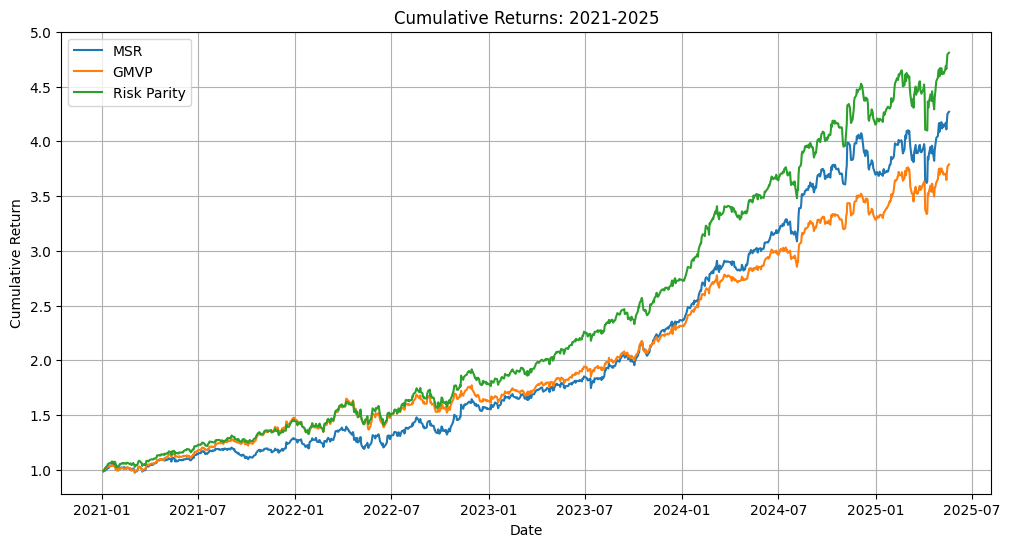

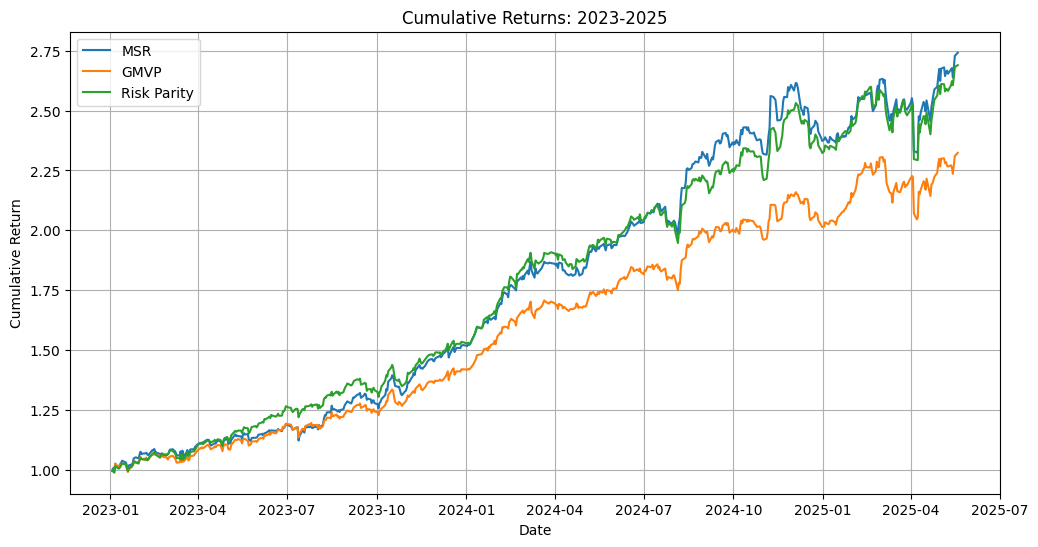

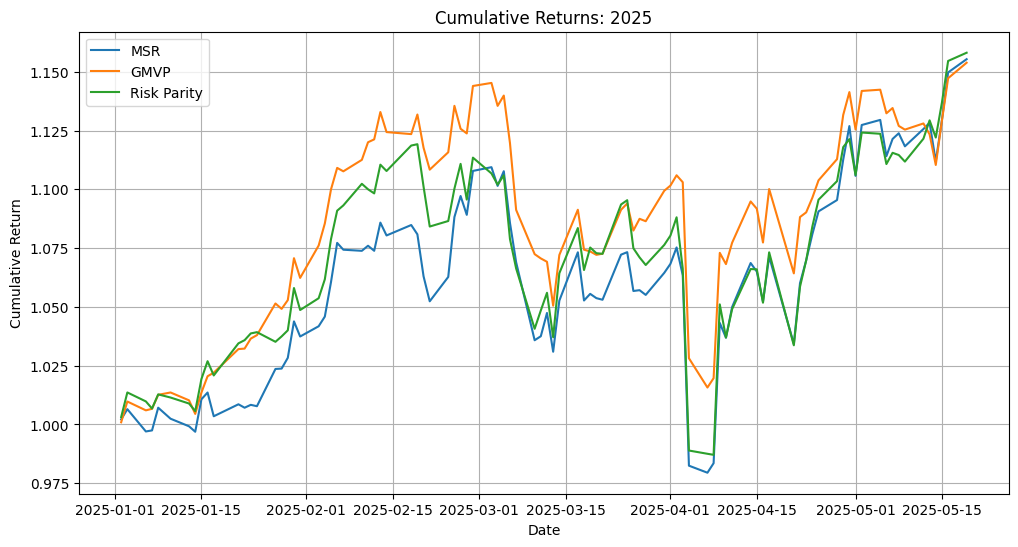

In [6]:
# Ensure plots display in Colab
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Define the stocks and portfolio allocations
stocks = ['EQT', 'TRGP', 'LLY', 'PANW', 'SMCI', 'COST', 'ORLY', 'PWR', 'PGR', 'FICO', 'AXON']

# Portfolio allocations
portfolios = {
    'MSR': {
        'LLY': 0.1807, 'COST': 0.1895, 'ORLY': 0.0091, 'PWR': 0.0454,
        'PGR': 0.3406, 'FICO': 0.1656, 'AXON': 0.0691
    },
    'GMVP': {
        'EQT': 0.0387, 'LLY': 0.1375, 'PANW': 0.0460, 'COST': 0.3133,
        'ORLY': 0.1505, 'PWR': 0.0447, 'PGR': 0.2571, 'AXON': 0.0121
    },
    'Risk Parity': {
        'EQT': 0.0547, 'TRGP': 0.0381, 'LLY': 0.1592, 'PANW': 0.0538, 'SMCI': 0.0290,
        'COST': 0.1557, 'ORLY': 0.1056, 'PWR': 0.0686, 'PGR': 0.2016, 'FICO': 0.0851, 'AXON': 0.0486
    }
}

# Define time periods
periods = {
    '2021-2025': ('2021-01-01', '2025-05-19'),
    '2023-2025': ('2023-01-01', '2025-05-19'),
    '2025': ('2025-01-01', '2025-05-19')
}

# Function to download stock data
def download_stock_data(start_date='2021-01-01', end_date='2025-05-19'):
    data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=True, progress=False)['Close']
    return data if not data.empty else None

# Function to load stock data from sp500_data.csv or download if missing
def load_stock_data():
    if os.path.exists('sp500_data.csv'):
        data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
        available_stocks = [stock for stock in stocks if stock in data.columns]
        return data[available_stocks] if available_stocks else None
    return download_stock_data()

# Load or download data
data = load_stock_data()
if data is None or data.empty:
    exit()

# Calculate daily returns
returns = data.pct_change().dropna()
if returns.empty:
    exit()

# Function to calculate portfolio returns
def portfolio_performance(weights, returns):
    portfolio_returns = returns @ weights
    return portfolio_returns

# Compute and plot cumulative returns
for period_name, (start_date, end_date) in periods.items():
    period_returns = returns.loc[start_date:end_date]
    if period_returns.empty:
        continue

    plt.figure(figsize=(12, 6))
    for portfolio_name, allocations in portfolios.items():
        weights = np.array([allocations.get(stock, 0) for stock in stocks])
        weights_sum = weights.sum()
        if weights_sum > 0:
            weights = weights / weights_sum
            port_returns = portfolio_performance(weights, period_returns[stocks])
            cum_ret = (1 + port_returns).cumprod()
            plt.plot(cum_ret.index, cum_ret, label=portfolio_name)
    plt.title(f'Cumulative Returns: {period_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()

>We have chosen to move forward with the **Risk Parity** portfolio due to its balanced risk allocation and robust performance across multiple time horizons. Below is the rationale:

- **Balanced Risk Contribution**: Risk Parity allocates weights to ensure each stock contributes equally to the portfolio’s overall risk, reducing reliance on any single asset and enhancing diversification.
- **Stability Across Periods**: Analysis over 5-year, 3-year, and 1-year windows shows Risk Parity maintains consistent returns with moderate volatility compared to Maximum Sharpe Ratio (MSR) and Global Minimum Variance (GMVP) portfolios.
- **Resilience to Market Fluctuations**: By balancing risk, this approach mitigates downside risk, making it suitable for volatile market conditions.
- **Alignment with Investment Goals**: Risk Parity supports our objective of achieving stable, long-term returns while minimizing extreme losses, as evidenced by its performance in rolling window analysis and efficient frontier positioning.

#Final Portfolio using Risk Parity



    EQT: 0.0547
    TRGP: 0.0381
    LLY: 0.1592
    PANW: 0.0538
    SMCI: 0.0290
    COST: 0.1557
    ORLY: 0.1056
    PWR: 0.0686
    PGR: 0.2016
    FICO: 0.0851
    AXON: 0.0486

> Performance from January 1st 2025 : **Up by 15%**